# Hurricane Michael

Download the hurricaneMichael.csv and US_states(5m).json files (Links to an external site.) for this assignment.

Using the geopandas library, turn the latitude and longitude columns into a geographical Point data type then make a geodataframe. Plot the path of Hurricane Michael onto the US map in the GeoJSON file.

Upload your notebook to Github and submit the URL for this assignment.

**Tips**

- After loading the US_states(5m).json file as a geodataframe, use the following code to create a geodataframe that only contains the contiguous United States (48 states):
```{
 map48 = map_df.loc[map_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]
 
 ```
 
- The longitude column data should be turned into negative values(data source listed longitude direction instead of positive/negative). Use the following code to make the data correct:

```{
    michaeldf['Long'] = 0 - michaeldf['Long']

```

In [15]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

df_mike = pd.read_csv('datasets/datasets_hurricaneMichael.csv')
df_mike.columns

Index(['AdvisoryNumber', 'Date', 'Lat', 'Long', 'Wind', 'Pres', 'Movement',
       'Type', 'Name', 'Received', 'Forecaster'],
      dtype='object')

In [16]:
df_mike['Long'] = 0 - df_mike['Long']

In [17]:
df_mike['coordinates'] = list(df_mike[['Long', 'Lat']].values) 

In [18]:
df_mike.columns

Index(['AdvisoryNumber', 'Date', 'Lat', 'Long', 'Wind', 'Pres', 'Movement',
       'Type', 'Name', 'Received', 'Forecaster', 'coordinates'],
      dtype='object')

In [19]:
df_mike['coordinates'].dtypes

dtype('O')

In [20]:
df_mike['coordinates'] = df_mike['coordinates'].apply(Point)

In [21]:
df_mike['coordinates'].dtypes

dtype('O')

In [22]:
geodf_mike = gpd.GeoDataFrame(df_mike, geometry='coordinates')

In [23]:
geodf_mike.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,POINT (-86.59999999999999 18)
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,POINT (-86.59999999999999 18.3)
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,POINT (-86.59999999999999 18.8)
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,POINT (-87.09999999999999 18.4)
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,POINT (-86.90000000000001 18.6)


In [24]:
type(geodf_mike['coordinates'])

geopandas.geoseries.GeoSeries

In [25]:
map_df = gpd.read_file('datasets/US_States(5m).json')
map_df.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."


In [26]:
map_df48 = map_df.loc[map_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]

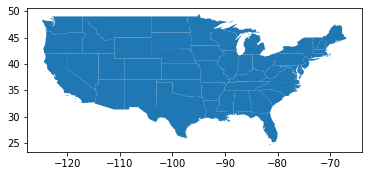

In [27]:
map_df48.plot()

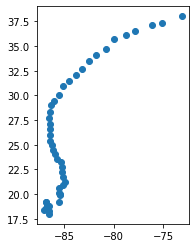

In [28]:
geodf_mike.plot()

Text(0.5, 1, 'Path of Hurricane Michael')

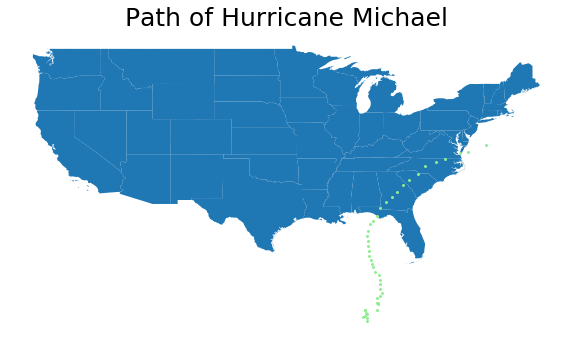

In [31]:
#this is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(10,12))

#this is the map
basemap = map_df48.plot(ax=ax)

#plot coordinates on top of map graph
geodf_mike.plot(ax=basemap, color='lightgreen', marker=".", markersize=15)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("Path of Hurricane Michael", fontsize=25, fontweight=3)